In [1]:
# Dataset: concrete.csv
# Location: https://mitu.co.in/dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('concrete.csv')

In [5]:
df.shape

(1030, 9)

In [7]:
list(df.columns)

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

In [8]:
# Missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
# Input data
x = df.drop('strength', axis = 1)

# output data
y = df['strength']

In [10]:
# Check the features 
x.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [11]:
# Check for the linear correlation
df.corrwith(df['strength'])

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
dtype: float64

In [12]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Create the object
scaler = MinMaxScaler()

In [14]:
# Apply
x_scaled = scaler.fit_transform(x)

In [20]:
# Cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [21]:
x_train.shape

(772, 8)

In [22]:
x_test.shape

(258, 8)

In [15]:
# Import the Regressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# Create the object
reg = KNeighborsRegressor(n_neighbors=5)

In [23]:
# Train the algorithm
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [24]:
# Predict on the unseen test data
y_pred = reg.predict(x_test)

In [25]:
# MAE ? MAPE?
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
mean_absolute_error(y_test, y_pred)

7.570596899224806

In [27]:
mean_absolute_percentage_error(y_test, y_pred)

0.31377816721166474

In [34]:
mae = []

for k in range(1,41):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    mae.append(mean_absolute_error(y_test, pred))

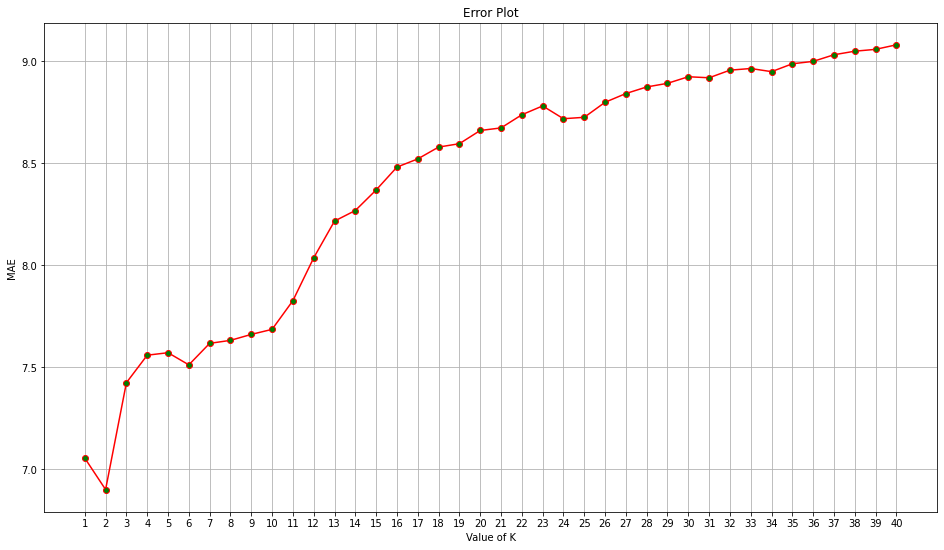

In [31]:
plt.figure(figsize=(16,9))
plt.title('Error Plot')
plt.xlabel('Value of K')
plt.ylabel('MAE')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), mae, color='red',marker='o',mfc='green')

In [35]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [36]:
new = [[313.3,262.2,0.0,175.5,8.6,1046.9,611.8,3]]

In [37]:
reg.predict(scaler.transform(new))

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([35.8])